# Import Library

In [1]:
# Data Loading
import xarray as xr  

# Data Processing
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Data Load

In [2]:
# data source : https://psl.noaa.gov/data/gridded/data.cmap.html
path = './precip.mon.ltm.nc'

ncfile = xr.open_dataset(path)
print(ncfile) # print dataset infomation 

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 88.75 86.25 83.75 ... -83.75 -86.25 -88.75
  * lon                 (lon) float32 1.25 3.75 6.25 ... 353.75 356.25 358.75
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    COARDS
    title:                          CPC Merged Analysis of Precipitation (exc...
    platform:                       Analyses
    source:                         ftp ftp.cpc.ncep.noaa.gov precip/cmap/mon...
    dataset_title:                  CPC Merged Analysis of Precipitation
    documentation:                  https://www.esrl.noaa.gov/psd/data/gridde...
    date_modified:              

/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


# Data Processing

In [3]:
# select variable
precip = ncfile.data_vars['precip']
print(precip.shape)  # [time, lat, lon]

(12, 72, 144)


In [4]:
# check null values
np.sum(np.isnan(precip))

<xarray.DataArray 'precip' ()>
array(5905)

In [5]:
# set spatial domain
precip_global = precip.sel(lon=ncfile.lon, lat=ncfile.lat) # here we set global domain
# yearly average
#precip = np.mean(precip, axis=0) # if there is any NaN values, retrun NaN.
year_ave = np.nanmean(precip_global, axis=0) # ignore NaN to calculate average.

/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [6]:
# let's see an example
print(np.mean([1,np.NaN, 3]))
print(np.nanmean([1,np.NaN, 3]))

nan
2.0


# Visualizatoin

In [7]:
# set map projection
m = Basemap(
    #projection='robin', # map projection
    lon_0=0, lat_0=0, # center of mat domain
    llcrnrlon=0., llcrnrlat=-90., urcrnrlon=360., urcrnrlat=90., # projection region
    resolution='l', # boundary resolution (c, l, i, h, f)
    
    ### for more details ###
    # https://matplotlib.org/basemap/api/basemap_api.html
)

In [8]:
# coordination
coord = np.meshgrid(ncfile.lon, ncfile.lat)

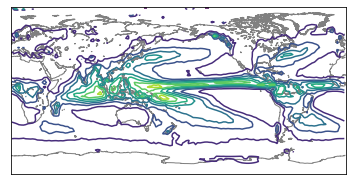

In [9]:
# draw countour map
m.drawcoastlines(linewidth=1.0, color='gray') # draw coastline 
m.contour(coord[0], coord[1], year_ave) # countour map

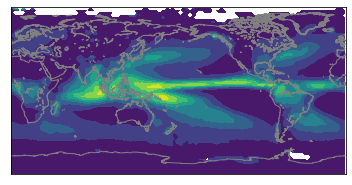

In [10]:
# draw countourf map
m.drawcoastlines(linewidth=1.0, color='gray') # draw coastline 
m.contourf(coord[0], coord[1], year_ave) # countourf map